In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing

# **Importing Dataset**

In [48]:
df = pd.read_csv('../dataset/Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## **Quantitative and Structural Analysis of DataFrame**

In [49]:
# Quantitative and Structural Analysis of the DataFrame.
print(df.describe(),'\n\n')
print('\n\n',df.info())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age           

### **Feature Selection according to task requirements.**

We have been assigned to segment customers on the basis of the following features:
1. Annual Income
2. Spending Score

In [50]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


# **Visualization of Raw Data**

### **Customer Segments (Annual Income vs Spending Score)**

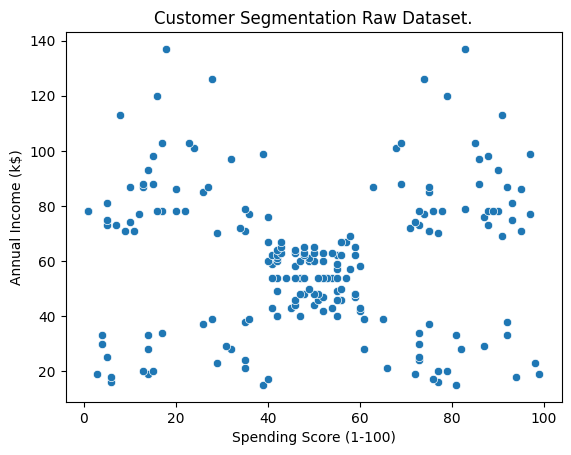

In [52]:
sns.scatterplot(
    data=X, 
    x='Spending Score (1-100)',
    y='Annual Income (k$)',
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation Raw Dataset.')
plt.show()

### **Scaling Dataset by StandardScalar**

In [53]:
stdScalar = preprocessing.StandardScaler()
X_scaled = pd.DataFrame(stdScalar.fit_transform(X), columns=stdScalar.feature_names_in_)
X_scaled.head()


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### **Implementing KMeans Clustering Algorithm.**

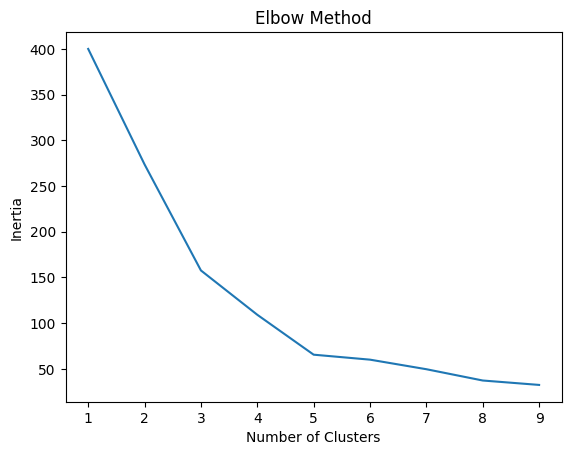

In [54]:
inertias = []

for k in range(1,10):
    kmeans = KMeans(
        n_clusters=k, 
        random_state=42, 
        max_iter=500
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

sns.lineplot(x=range(1,10), y=(inertias))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

### **Inertia stopped dropping after 5**

In [60]:
# Training KMeans on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Adding cluster labels to the original dataFrame.
X_scaled['Cluster'] = clusters

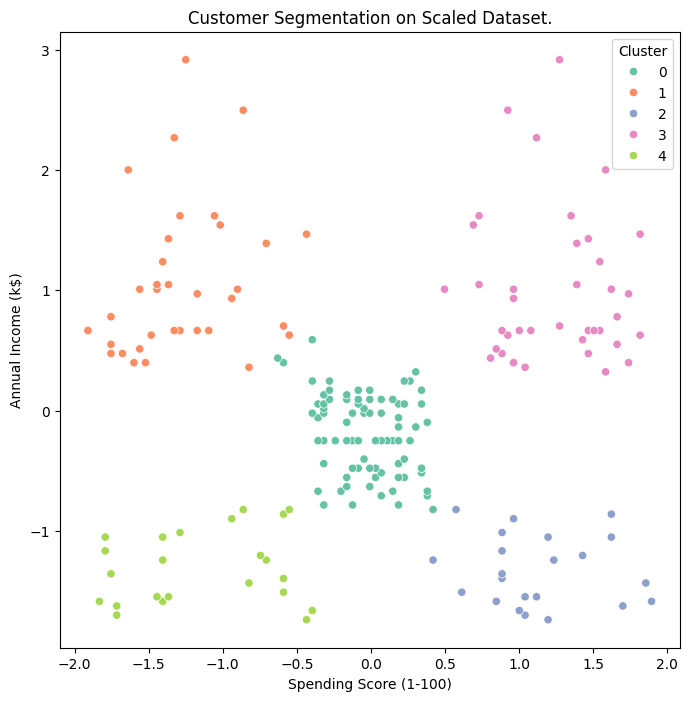

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    data=X_scaled, 
    x='Spending Score (1-100)', 
    y='Annual Income (k$)',
    hue='Cluster',
    palette='Set2'
)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation on Scaled Dataset.')
plt.show()

# **Model Evaluation**

In [62]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k=5: {silhouette_avg:.2f}")

Silhouette Score for k=5: 0.70
